In [39]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
# Importing the dataset
dataset = pd.read_excel('Dados_Aluguel_CXS.xlsx')

In [4]:
dataset.head()

,ID,Metragem,Quartos,Banheiros,Suite,Vagas,Aluguel
0,0,120,3,3,1,1,2200
1,1,70,2,1,0,1,780
2,2,213,3,3,3,2,6000
3,3,105,3,2,0,1,1850
4,4,130,3,2,1,3,1800


In [25]:
X = dataset.iloc[:,1:6].values
y = dataset.iloc[:, 6].values

TRATAMENTO DADOS FALTANTES - SEM DADOS FALTANTES

In [30]:
dataset[dataset.isna()].count()

ID           0
Metragem     0
Quartos      0
Banheiros    0
Suite        0
Vagas        0
Aluguel      0
dtype: int64

ANÁLISE EXPLORATÓRIA DE DADOS - AED

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f964094f990>,
      dtype=object)

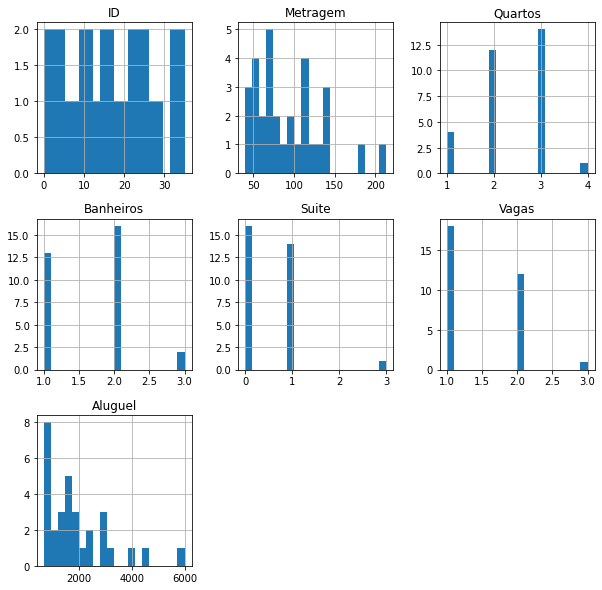

In [31]:
dataset.hist(figsize=(10,10),bins=20)

In [32]:
dataset.describe()

,ID,Metragem,Quartos,Banheiros,Suite,Vagas,Aluguel
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.612903,92.387097,2.387097,1.645161,0.548387,1.451613,1910.967742
std,10.455230,41.870974,0.760588,0.608188,0.675214,0.567962,1243.426328
min,0.000000,40.000000,1.000000,1.000000,0.000000,1.000000,650.000000
25%,8.500000,59.000000,2.000000,1.000000,0.000000,1.000000,950.000000
50%,16.000000,81.000000,2.000000,2.000000,0.000000,1.000000,1700.000000
75%,24.500000,113.000000,3.000000,2.000000,1.000000,2.000000,2500.000000
max,35.000000,213.000000,4.000000,3.000000,3.000000,3.000000,6000.000000


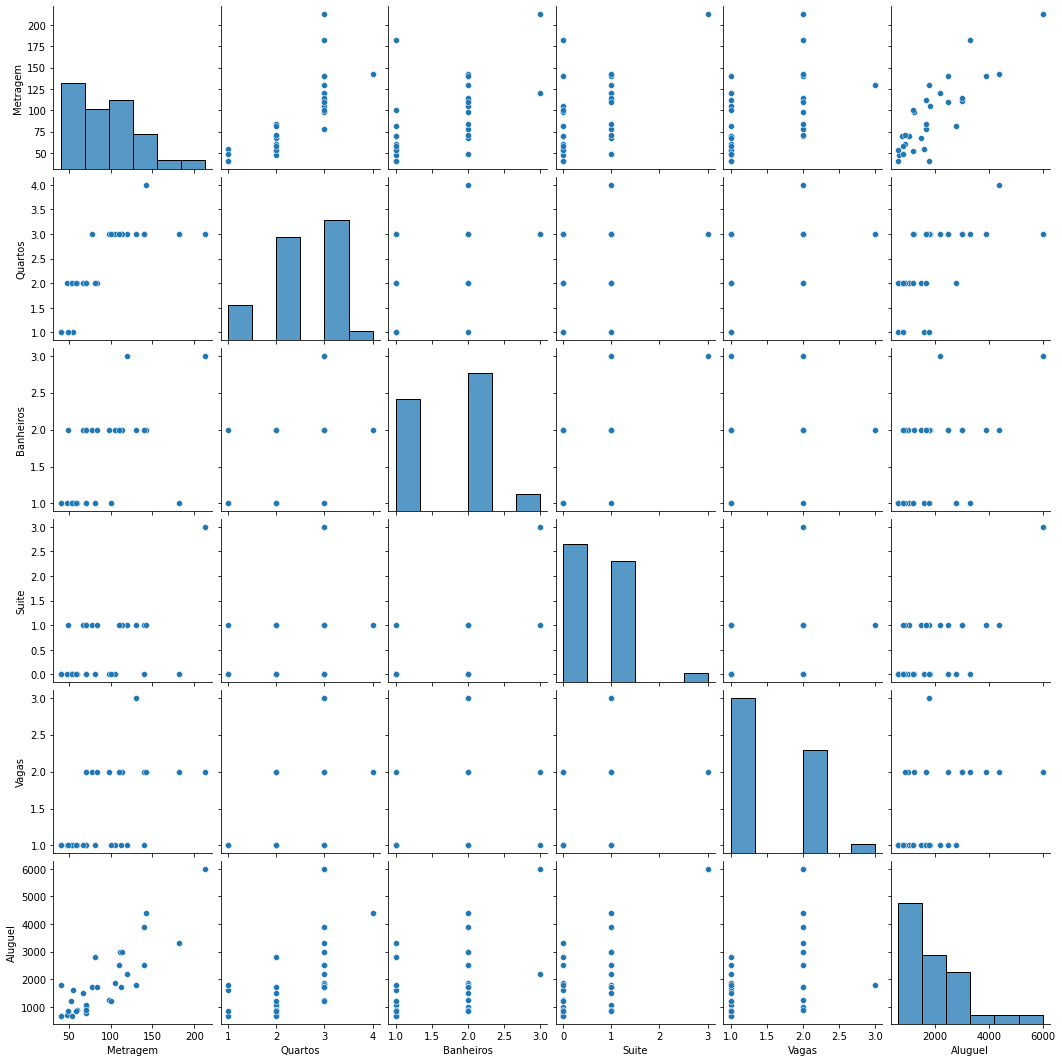

In [35]:
sns.pairplot(dataset[['Metragem','Quartos','Banheiros','Suite', 'Vagas', 'Aluguel']])

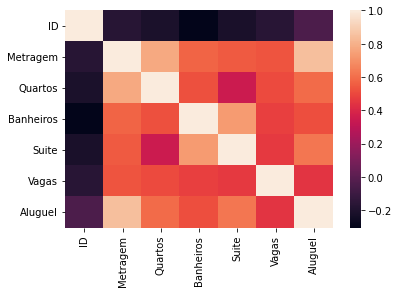

In [37]:
cor = dataset.corr()
sns.heatmap(cor)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


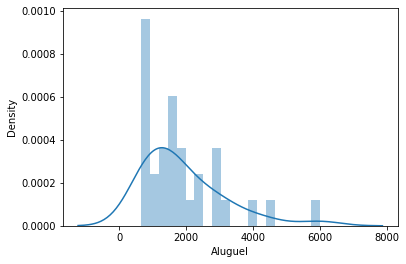

In [38]:
sns.distplot(dataset.Aluguel,bins=20)

In [26]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

INICIANDO A MODELAGEM

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [46]:
lin_reg.score(X_train, y_train)

0.5145100529198394

In [47]:
y_pred = lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.8674992125619951

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

346277.3508580014

In [51]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

In [52]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
tree_reg.score(X_train, y_train)

0.9632599309007686

In [76]:
y_pred2 = tree_reg.predict(X_test)
r2_score(y_test,y_pred2)

0.15268373615532937

In [56]:
mean_squared_error(y_test,y_pred2)

2214375.0

CROSS VALIDATION

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [65]:
tree_rmse_score = np.sqrt(-scores)
np.mean(tree_rmse_score)

955.3453482183913

In [68]:
scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [70]:
lin_reg_rmse_score = np.sqrt(-scores)
np.mean(tree_rmse_score)

929.1080568275539

TESTANDO CROSS VALIDATION COM RANDON FOREST

In [71]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
rf_reg.score(X_train, y_train)

0.8740612768730572

In [77]:
y_pred3 = rf_reg.predict(X_test)
r2_score(y_test,y_pred3)

0.47187880594957543

In [78]:
mean_squared_error(y_test,y_pred3)

1380191.103342014

In [83]:
scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=10)

In [84]:
rf_reg_rmse_score = np.sqrt(-scores)
np.mean(rf_reg_rmse_score)

667.9731982696219

CALIBRAÇÃO DE MODELOS

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [86]:
from sklearn.model_selection import GridSearchCV

In [95]:
param_grid = {'n_estimators': [3, 10, 30, 50, 100, 250, 500], 'max_features': [2, 4, 6, 8, 10, 20]}

In [96]:
grid = GridSearchCV(rf_reg, param_grid, scoring='neg_mean_squared_error', return_train_score=True)

In [97]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8, 10, 20],
                         'n_estimators': [3, 10, 30, 50, 100, 250, 500]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [98]:
grid.best_params_

{'max_features': 4, 'n_estimators': 50}

In [99]:
np.sqrt(-grid.best_score_)

732.2026031946349